# Pretreatment

## Data import

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv(".\\nba_logreg.csv")

# extract names, labels, features names and values
names = df['Name'].values.tolist() # players names
labels = df['TARGET_5Yrs'].values # labels
paramset = df.drop(['TARGET_5Yrs','Name'],axis=1).columns.values
#paramset = df[["GP","MIN","PTS"]].columns.values
df_vals = df.drop(['TARGET_5Yrs','Name'],axis=1).values
#df_vals = df[["GP","MIN","PTS"]].values

## Missing values

In [2]:
df.isna().any()

Name           False
GP             False
MIN            False
PTS            False
FGM            False
FGA            False
FG%            False
3P Made        False
3PA            False
3P%             True
FTM            False
FTA            False
FT%            False
OREB           False
DREB           False
REB            False
AST            False
STL            False
BLK            False
TOV            False
TARGET_5Yrs    False
dtype: bool

In [3]:
df.isna().sum()

Name            0
GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64

In [4]:
df.loc[df['3P%'].isna()]

Name  GP   MIN   PTS  FGM  FGA   FG%  3P Made  3PA  3P%  ...  \
338     Ken Johnson  64  12.7   4.1  1.8  3.3  52.8      0.0  0.0  NaN  ...   
339     Ken Johnson  64  12.7   4.1  1.8  3.3  52.8      0.0  0.0  NaN  ...   
340   Pete Williams  53  10.8   2.8  1.3  2.1  60.4      0.0  0.0  NaN  ...   
358   Melvin Turpin  79  24.7  10.6  4.6  9.0  51.1      0.0  0.0  NaN  ...   
386    Jim Petersen  60  11.9   3.2  1.2  2.4  48.6      0.0  0.0  NaN  ...   
397   Tom Scheffler  39   6.9   1.3  0.5  1.3  41.2      0.0  0.0  NaN  ...   
507    Sam Williams  59  18.2   6.1  2.6  4.7  55.6      0.0  0.0  NaN  ...   
509   Kurt Nimphius  63  17.2   5.3  2.2  4.7  46.1      0.0  0.0  NaN  ...   
510  Pete Verhoeven  71  17.0   4.9  2.1  4.2  50.3      0.0  0.0  NaN  ...   
521       Jim Smith  72  11.9   2.9  1.2  2.3  50.9      0.0  0.0  NaN  ...   
559    Jeff Wilkins  56  18.9   4.7  2.1  4.6  45.0      0.0  0.0  NaN  ...   

     FTA   FT%  OREB  DREB  REB  AST  STL  BLK  TOV  TARGET_5Yrs  
338  1.3  43.5   1.4   2.4  3.8  0.3  0.2  0.3  0.9          0.0  
339  1.3  43.5   1.4   2.4  3.8  0.3  0.2  0.3  0.9          0.0  
340  0.8  42.5   0.9   1.9  2.8  0.3  0.4  0.4  0.4          0.0  
358  1.8  78.4   2.0   3.8  5.7  0.5  0.5  1.1  1.5          1.0  
386  1.1  75.8   0.7   1.7  2.5  0.5  0.2  0.5  1.2          1.0  
397  0.5  50.0   0.5   1.5  1.9  0.3  0.2  0.3  0.4          0.0  
507  1.5  55.1   1.5   3.7  5.2  0.6  0.8  1.3  1.1          0.0  
509  1.7  58.3   1.5   3.2  4.7  1.0  0.3  1.3  0.9          1.0  
510  1.0  70.8   1.5   2.1  3.6  0.7  0.6  0.3  0.8          1.0  
521  1.2  45.9   1.0   1.5  2.5  0.6  0.3  0.7  0.7          0.0  
559  0.7  67.5   1.1   3.8  4.9  0.7  0.6  0.8  1.1          1.0  

[11 rows x 21 columns]

In [5]:
'''
The missing values are caracterized by 3PA=0 so we replace them by 0
'''

df["3P%"]=df['3P%'].fillna(0) 

## Preparing the data for training

In [6]:
# extract names, labels, features names and values
names = df['Name'].values.tolist() # players names
labels = df['TARGET_5Yrs'].values # labels
paramset = df.drop(['TARGET_5Yrs','Name'],axis=1).columns.values
df_vals = df.drop(['TARGET_5Yrs','Name'],axis=1).values


In [7]:
#normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(df_vals)

In [8]:
X

array([[0.35211268, 0.64285714, 0.24363636, ..., 0.16      , 0.1025641 ,
        0.27906977],
       [0.33802817, 0.62962963, 0.23636364, ..., 0.44      , 0.12820513,
        0.34883721],
       [0.88732394, 0.32275132, 0.16363636, ..., 0.2       , 0.07692308,
        0.20930233],
       ...,
       [0.45070423, 0.23809524, 0.17090909, ..., 0.12      , 0.1025641 ,
        0.18604651],
       [0.57746479, 0.23544974, 0.13818182, ..., 0.16      , 0.02564103,
        0.1627907 ],
       [0.50704225, 0.22751323, 0.13454545, ..., 0.28      , 0.02564103,
        0.18604651]])

In [9]:
import joblib
joblib.dump(scaler, 'nba.scaler')

['nba.scaler']

# Training 

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import KFold
import numpy as np
import sklearn

def score_classifier(dataset,classifier,labels):

    """
    performs 3 random trainings/tests to build a confusion matrix and prints results with precision and recall scores
    :param dataset: the dataset to work on
    :param classifier: the classifier to use
    :param labels: the labels used for training and validation
    :return classifier: the classifier trained
    """


    kf = KFold(n_splits=3,random_state=50,shuffle=True)
    confusion_mat = np.zeros((2,2))
    recall = 0
    for training_ids,test_ids in kf.split(dataset):
        training_set = dataset[training_ids]
        training_labels = labels[training_ids]
        test_set = dataset[test_ids]
        test_labels = labels[test_ids]
        classifier.fit(training_set,training_labels)
        predicted_labels = classifier.predict(test_set)
        confusion_mat+=confusion_matrix(test_labels,predicted_labels)
        recall += recall_score(test_labels, predicted_labels)
    recall/=3
    print(confusion_mat)
    print("recall :", recall)

## SVC

In [11]:
from sklearn.svm import SVC

#first test
score_classifier(X,SVC(),labels)

[[269. 240.]
 [146. 685.]]
recall : 0.8243162205866037


Recall of 82.4%.
We tune the parameters to improve the recall

In [12]:
from sklearn.model_selection import RandomizedSearchCV

In [13]:
from sklearn.model_selection import GridSearchCV

#parameters to test
tuned_parameters = [
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
    {"kernel": ["linear"], "C": [1, 10, 100, 1000]},
]

In [14]:
#gridsearch with cross validation
svc = SVC()
kf = KFold(n_splits=3,random_state=50,shuffle=True)
clf = GridSearchCV(svc, tuned_parameters, cv=kf.split(X))
clf.fit(X, labels)

GridSearchCV(cv=<generator object _BaseKFold.split at 0x000001F6590F3EB0>,
             estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [15]:
nb_best_params = np.argmin(clf.cv_results_['rank_test_score'])

In [16]:
print("best params: ", clf.cv_results_["params"][nb_best_params])

best params:  {'C': 100, 'kernel': 'linear'}


The best parameters among the tested parameters are printed above

We perform another gridsearch to improve the parameters

In [17]:
#parameters_to_test
tuned_parameters = [{"kernel": ["linear"], "C": [50, 100, 150, 200, 500]}]

In [18]:
#second gridsearch
clf = GridSearchCV(svc, tuned_parameters, cv=kf.split(X))
clf.fit(X, labels)

GridSearchCV(cv=<generator object _BaseKFold.split at 0x000001F65912A9E0>,
             estimator=SVC(),
             param_grid=[{'C': [50, 100, 150, 200, 500], 'kernel': ['linear']}])

In [19]:
nb_best_params = np.argmin(clf.cv_results_['rank_test_score'])

In [20]:
print("best params: ", clf.cv_results_["params"][nb_best_params])

best params:  {'C': 150, 'kernel': 'linear'}


Last gridsearch

In [21]:
#parameters to test
tuned_parameters = [{"kernel": ["linear"], "C": [150 - 5*i for i in range(5)] + [150 + 5*i for i in range(5)]}]

In [22]:
#third gridsearch
clf = GridSearchCV(svc, tuned_parameters, cv=kf.split(X))
clf.fit(X, labels)

GridSearchCV(cv=<generator object _BaseKFold.split at 0x000001F65914E040>,
             estimator=SVC(),
             param_grid=[{'C': [150, 145, 140, 135, 130, 150, 155, 160, 165,
                                170],
                          'kernel': ['linear']}])

In [23]:
nb_best_params = np.argmin(clf.cv_results_['rank_test_score'])

In [24]:
print("best params: ", clf.cv_results_["params"][nb_best_params])

best params:  {'C': 150, 'kernel': 'linear'}


In [25]:
#best estimator
clf_be = clf.best_estimator_

In [26]:
#score of the best estimator
score_classifier(X,clf_be,labels)

[[266. 243.]
 [143. 688.]]
recall : 0.8278417679640665


With SVC, we manage to get a recall of 82.8%, which is an improvement of almost 0.4%

We try an other approch to perform this classification : random forest classifier

## Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
#first test
score_classifier(X,RandomForestClassifier(),labels)

[[281. 228.]
 [177. 654.]]
recall : 0.7865669996139378


We perform a gridsearch to improve the score

In [29]:
#parameters to test

param_grid = {
    'bootstrap': [True],
    'max_depth': [5, 10, 50, 100],
    'max_features': [2, 3, 5, 10, 'sqrt','auto'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [10, 50, 100, 200, 500], 
}



In [30]:
#grid search
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = kf.split(X), n_jobs = -1, verbose = 2)
grid_search.fit(X, labels)

Fitting 3 folds for each of 1080 candidates, totalling 3240 fits


GridSearchCV(cv=<generator object _BaseKFold.split at 0x000001F6593D5B30>,
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, 50, 100],
                         'max_features': [2, 3, 5, 10, 'sqrt', 'auto'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200, 500]},
             verbose=2)

In [31]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 200}

In [32]:
#parameters to test

param_grid = {
    'max_depth': [2, 3, 5, 7, 8],
    'max_features': [7, 10, 15],
    'min_samples_leaf': [4, 7, 10, 20],
    'min_samples_split': [10, 15, 20],
    'n_estimators': [200], 
}



In [33]:
#grid search
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = kf.split(X), n_jobs = -1, verbose = 2)
grid_search.fit(X, labels)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


GridSearchCV(cv=<generator object _BaseKFold.split at 0x000001F659867970>,
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 7, 8],
                         'max_features': [7, 10, 15],
                         'min_samples_leaf': [4, 7, 10, 20],
                         'min_samples_split': [10, 15, 20],
                         'n_estimators': [200]},
             verbose=2)

In [34]:
grid_search.best_params_

{'max_depth': 5,
 'max_features': 7,
 'min_samples_leaf': 10,
 'min_samples_split': 20,
 'n_estimators': 200}

In [35]:
mdl_be = grid_search.best_estimator_


In [36]:
score_classifier(X,mdl_be,labels)

[[275. 234.]
 [160. 671.]]
recall : 0.8071814786031677


The gridsearch resulted in an increase of the average recall of about 2%, but this model is not as performant as the csv model

We try a last approach to perform the classification : the use of a neural network

## Neural network 

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [38]:
"""
Initialize a neural network for binary classification
:return model: the model 
"""

def get_model():
    model = Sequential()
    model.add(Dropout(0.2))
    model.add(Dense(12, activation = "relu",bias_regularizer=regularizers.l2(1e-4),))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation = "sigmoid"))
    return model


In [39]:
mod = get_model()

In [40]:
"""
We define a scoring function that is specific to neural nets for two reasons:
- If we fit several times on a model, it does not forget the previous fits
- the NN returns probabilities between 0 and 1, not integers 
The scoring function works as previously : we split the dataset into 3 folds (the same) and we average the recalls obtained

:param model_func: function that calls an initialized model
:param epoch: number of epochs
:return l_hist: list of the history of the three trainings

"""

def score_classifier_nn(model_func=get_model,epochs=100):
    kf = KFold(n_splits=3,random_state=50,shuffle=True)
    recall = 0
    l_hist=[]
    for training_ids, test_ids in kf.split(X):
        mod = model_func()
        mod.compile(optimizer = 'adam',loss='binary_crossentropy',metrics ="Recall")
        hist = mod.fit(X[training_ids], labels[training_ids], epochs=epochs, validation_data = (X[test_ids], labels[test_ids]))
        score = mod.evaluate(X[test_ids], labels[test_ids])
        recall += score[1]
        l_hist.append(hist)
    recall/=3
    print()
    print("Average recall : ",recall)
    return l_hist


In [41]:
#test of the model with 100 epochs
l_hist = score_classifier_nn(epochs=100)

Epoch 1/100
28/28 [==============================] - 1s 7ms/step - loss: 0.7292 - recall: 0.2004 - val_loss: 0.6939 - val_recall: 0.4338
Epoch 2/100
28/28 [==============================] - 0s 2ms/step - loss: 0.6874 - recall: 0.6619 - val_loss: 0.6686 - val_recall: 1.0000
Epoch 3/100
28/28 [==============================] - 0s 2ms/step - loss: 0.6581 - recall: 0.9463 - val_loss: 0.6537 - val_recall: 1.0000
Epoch 4/100
28/28 [==============================] - 0s 2ms/step - loss: 0.6444 - recall: 0.9839 - val_loss: 0.6478 - val_recall: 1.0000
Epoch 5/100
28/28 [==============================] - 0s 2ms/step - loss: 0.6301 - recall: 0.9982 - val_loss: 0.6463 - val_recall: 1.0000
Epoch 6/100
28/28 [==============================] - 0s 2ms/step - loss: 0.6329 - recall: 0.9964 - val_loss: 0.6450 - val_recall: 1.0000
Epoch 7/100
28/28 [==============================] - 0s 2ms/step - loss: 0.6282 - recall: 0.9946 - val_loss: 0.6439 - val_recall: 1.0000
Epoch 8/100
28/28 [======================

28/28 [==============================] - 0s 2ms/step - loss: 0.5833 - recall: 0.8247 - val_loss: 0.6180 - val_recall: 0.8309
Epoch 61/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5828 - recall: 0.8068 - val_loss: 0.6184 - val_recall: 0.8346
Epoch 62/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5806 - recall: 0.8265 - val_loss: 0.6195 - val_recall: 0.8382
Epoch 63/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5698 - recall: 0.8265 - val_loss: 0.6187 - val_recall: 0.8309
Epoch 64/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5831 - recall: 0.8372 - val_loss: 0.6189 - val_recall: 0.8309
Epoch 65/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5801 - recall: 0.8104 - val_loss: 0.6177 - val_recall: 0.8235
Epoch 66/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5910 - recall: 0.8193 - val_loss: 0.6183 - val_recall: 0.8272
Epoch 67/100
28/28 [===========================

Epoch 19/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6167 - recall: 0.8953 - val_loss: 0.5973 - val_recall: 0.9422
Epoch 20/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6089 - recall: 0.9007 - val_loss: 0.5969 - val_recall: 0.9386
Epoch 21/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6133 - recall: 0.8646 - val_loss: 0.5959 - val_recall: 0.9242
Epoch 22/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6070 - recall: 0.8809 - val_loss: 0.5953 - val_recall: 0.9206
Epoch 23/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6017 - recall: 0.8881 - val_loss: 0.5951 - val_recall: 0.9278
Epoch 24/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6057 - recall: 0.8682 - val_loss: 0.5947 - val_recall: 0.9206
Epoch 25/100
28/28 [==============================] - 0s 2ms/step - loss: 0.6038 - recall: 0.8664 - val_loss: 0.5943 - val_recall: 0.9025
Epoch 26/100
28/28 [==============

28/28 [==============================] - 0s 2ms/step - loss: 0.6054 - recall: 0.8231 - val_loss: 0.5864 - val_recall: 0.8339
Epoch 79/100
28/28 [==============================] - 0s 2ms/step - loss: 0.6061 - recall: 0.8375 - val_loss: 0.5873 - val_recall: 0.8339
Epoch 80/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5938 - recall: 0.8177 - val_loss: 0.5866 - val_recall: 0.8159
Epoch 81/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5911 - recall: 0.8303 - val_loss: 0.5852 - val_recall: 0.8267
Epoch 82/100
28/28 [==============================] - 0s 2ms/step - loss: 0.6072 - recall: 0.8285 - val_loss: 0.5857 - val_recall: 0.8303
Epoch 83/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5946 - recall: 0.8267 - val_loss: 0.5852 - val_recall: 0.8267
Epoch 84/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5955 - recall: 0.8177 - val_loss: 0.5846 - val_recall: 0.8303
Epoch 85/100
28/28 [===========================

Epoch 37/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6189 - recall: 0.8215 - val_loss: 0.5757 - val_recall: 0.8830
Epoch 38/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6203 - recall: 0.8142 - val_loss: 0.5757 - val_recall: 0.8794
Epoch 39/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6126 - recall: 0.8379 - val_loss: 0.5745 - val_recall: 0.8794
Epoch 40/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6210 - recall: 0.8434 - val_loss: 0.5755 - val_recall: 0.8723
Epoch 41/100
28/28 [==============================] - 0s 2ms/step - loss: 0.6206 - recall: 0.8142 - val_loss: 0.5796 - val_recall: 0.8546
Epoch 42/100
28/28 [==============================] - 0s 2ms/step - loss: 0.6113 - recall: 0.8215 - val_loss: 0.5757 - val_recall: 0.8723
Epoch 43/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6155 - recall: 0.8488 - val_loss: 0.5760 - val_recall: 0.8688
Epoch 44/100
28/28 [==============

28/28 [==============================] - 0s 2ms/step - loss: 0.6142 - recall: 0.7960 - val_loss: 0.5664 - val_recall: 0.8404
Epoch 97/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6071 - recall: 0.8233 - val_loss: 0.5661 - val_recall: 0.8475
Epoch 98/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6093 - recall: 0.8015 - val_loss: 0.5677 - val_recall: 0.8404
Epoch 99/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6072 - recall: 0.7996 - val_loss: 0.5660 - val_recall: 0.8688
Epoch 100/100
14/14 [==============================] - 0s 539us/step - loss: 0.5674 - recall: 0.8475

Average recall :  0.8252564867337545


Choice of the optimal number of epochs

In [42]:
hist1, hist2, hist3 = l_hist

In [43]:
hist1.history.keys()

dict_keys(['loss', 'recall', 'val_loss', 'val_recall'])

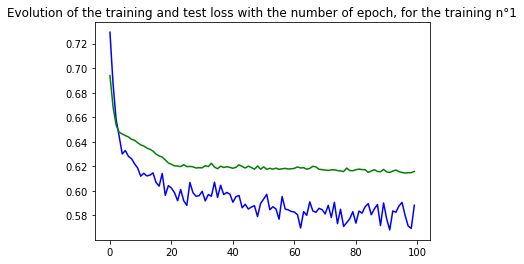

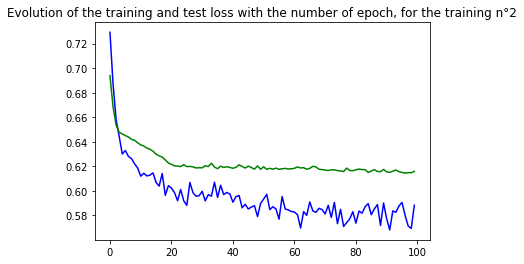

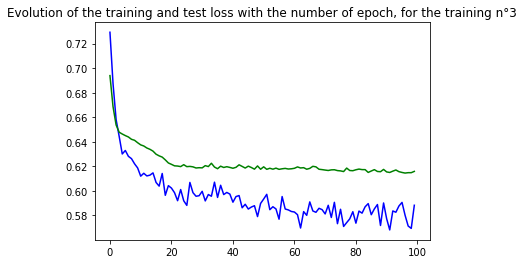

In [44]:
import matplotlib.pyplot as plt

for i in range(len(l_hist)):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(hist1.history["loss"], c="blue", label = "training_loss_"+str(i))
    plt.plot(hist1.history["val_loss"], c="green", label = "test_loss_"+str(i))
    ax.set_title("Evolution of the training and test loss with the number of epoch, for the training n°{}".format(i+1))
    plt.show(fig)


In every case, the test_loss stops decreasing from the 20th epoch.
Thus, we start another training with only 20 epochs in order not to overfit.

In [45]:
l_hist = score_classifier_nn(epochs=20)

Epoch 1/20
28/28 [==============================] - 0s 6ms/step - loss: 0.6724 - recall: 0.8444 - val_loss: 0.6665 - val_recall: 1.0000
Epoch 2/20
28/28 [==============================] - 0s 2ms/step - loss: 0.6461 - recall: 0.9589 - val_loss: 0.6536 - val_recall: 1.0000
Epoch 3/20
28/28 [==============================] - 0s 2ms/step - loss: 0.6415 - recall: 0.9911 - val_loss: 0.6491 - val_recall: 1.0000
Epoch 4/20
28/28 [==============================] - 0s 5ms/step - loss: 0.6326 - recall: 0.9946 - val_loss: 0.6434 - val_recall: 1.0000
Epoch 5/20
28/28 [==============================] - 0s 1ms/step - loss: 0.6376 - recall: 0.9911 - val_loss: 0.6391 - val_recall: 1.0000
Epoch 6/20
28/28 [==============================] - 0s 1ms/step - loss: 0.6159 - recall: 0.9964 - val_loss: 0.6356 - val_recall: 1.0000
Epoch 7/20
28/28 [==============================] - 0s 2ms/step - loss: 0.6080 - recall: 0.9946 - val_loss: 0.6335 - val_recall: 1.0000
Epoch 8/20
28/28 [==============================

Epoch 20/20
14/14 [==============================] - 0s 616us/step - loss: 0.5872 - recall: 0.9539

Average recall :  0.9239784280459086


The recall is about 92%.
We will thus retain this model

In [46]:
#we train the model on all the data and export it

mdl = get_model()
mdl.compile(optimizer = 'adam',loss='binary_crossentropy',metrics ="Recall")
mdl.fit(X, labels, epochs=20)
mdl.save("./nba_nn.mdl")

Epoch 1/20
42/42 [==============================] - 0s 789us/step - loss: 0.6585 - recall: 0.9483
Epoch 2/20
42/42 [==============================] - 0s 805us/step - loss: 0.6579 - recall: 0.9759
Epoch 3/20
42/42 [==============================] - 0s 829us/step - loss: 0.6407 - recall: 0.9892
Epoch 4/20
42/42 [==============================] - 0s 903us/step - loss: 0.6344 - recall: 0.9892
Epoch 5/20
42/42 [==============================] - 0s 854us/step - loss: 0.6329 - recall: 0.9844
Epoch 6/20
42/42 [==============================] - 0s 829us/step - loss: 0.6277 - recall: 0.9819
Epoch 7/20
42/42 [==============================] - 0s 878us/step - loss: 0.6171 - recall: 0.9675
Epoch 8/20
42/42 [==============================] - 0s 805us/step - loss: 0.6202 - recall: 0.9639
Epoch 9/20
42/42 [==============================] - 0s 805us/step - loss: 0.6139 - recall: 0.9398
Epoch 10/20
42/42 [==============================] - 0s 829us/step - loss: 0.6167 - recall: 0.9386
Epoch 11/20
42/42 [

In [47]:
from keras.models import load_model
NBA_MODEL = load_model('./nba_nn.mdl')
